In [1]:
from directories import train_images, train_masks, validation_images, validation_masks, test_images, test_masks
image_size = (128, 128)
mask_size = (128, 128)

train_images_size = 2200
batch_size = 4
steps_per_epoch = train_images_size // batch_size

validation_images_size = 450
validation_batch_size = 1
validation_steps = validation_images_size // validation_batch_size

learning_rate = 5e-4
epochs = 50

In [2]:
from load import MakeDataset, Preprocessed_Dataset
train_dataset = Preprocessed_Dataset(train_images, train_masks, image_size, mask_size, train_images_size, batch_size)
validation_dataset = Preprocessed_Dataset(validation_images, validation_masks, image_size, mask_size, validation_images_size, validation_batch_size)

2022-10-16 22:09:29.023464: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-16 22:09:31.837435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-16 22:09:31.861453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-16 22:09:31.861811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-16 22:09:31.862179: I t

0.039215688 0.95686275 (128, 128, 3)


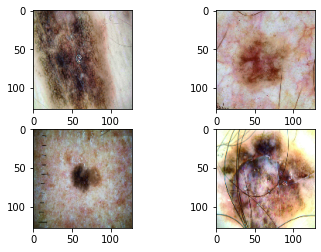

0.0 1.0 (128, 128, 1)


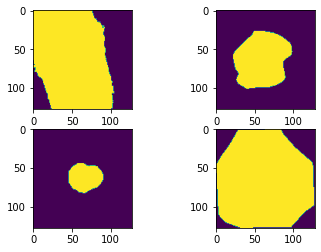

In [3]:
import matplotlib.pyplot as plt
for image, mask in train_dataset.take(1).as_numpy_iterator():
  im1, im2, im3, im4, *_ = image
  print(min(im1.flatten()), max(im1.flatten()), im1.shape)
  f, axarr = plt.subplots(2,2)
  axarr[0,0].imshow(im1)
  axarr[0,1].imshow(im2)
  axarr[1,0].imshow(im3)
  axarr[1,1].imshow(im4)
  plt.show()

  im1, im2, im3, im4, *_ = mask
  print(min(im1.flatten()), max(im1.flatten()), im1.shape)
  f, axarr = plt.subplots(2,2)
  axarr[0,0].imshow(im1.squeeze(axis=2))
  axarr[0,1].imshow(im2.squeeze(axis=2))
  axarr[1,0].imshow(im3.squeeze(axis=2))
  axarr[1,1].imshow(im4.squeeze(axis=2))

In [3]:
#with strategy.scope():
from models import *
from tensorflow.keras.optimizers import Adam
from load import load_saved_model

#model = load_saved_model("batch_transpose_4_1000_5e-5_100+100.h5")
model = batch_normalization_model(image_size)

In [4]:
from metrics import jacc_loss, dice_coef, jacc_coef, acc, mean_IoU, sensitivity, specificity
model.compile(optimizer = Adam(learning_rate=learning_rate), loss = jacc_loss, metrics = [acc, dice_coef, jacc_coef, mean_IoU, sensitivity,specificity])

In [5]:
history = model.fit(
    train_dataset, 
    batch_size=batch_size, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    validation_data=validation_dataset, 
    validation_batch_size=validation_batch_size,
    validation_steps=validation_steps
)

Epoch 1/100


2022-10-16 22:09:08.818880: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-10-16 22:09:09.942046: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-16 22:09:10.336823: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-16 22:09:10.337025: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-10-16 22:09:10.467246: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

 81/500 [===>..........................] - ETA: 46s - loss: 0.4546 - binary_accuracy: 0.8689 - dice_coef: 0.6402 - jacc_coef: 0.5454 - mean_IoU: 0.6314 - sensitivity: 0.7986 - specificity: 0.9106

In [6]:
from utils import plot_graphs, save_dict_as_json, load_multiple

In [7]:
save_dict_as_json(history.history, "batch_transpose_4_1000_5e-4")
model.save("batch_transpose_4_1000_5e-4.h5")

In [9]:
history = load_multiple("batch_transpose_4_1000_5e-4.json")

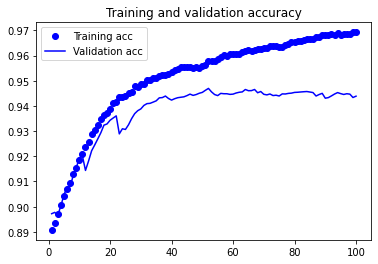

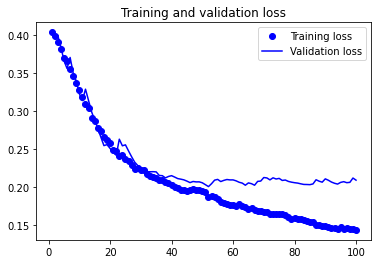

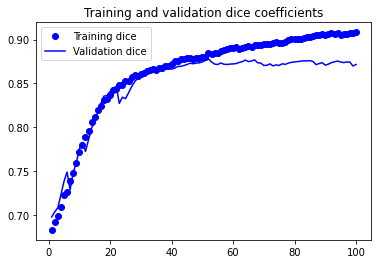

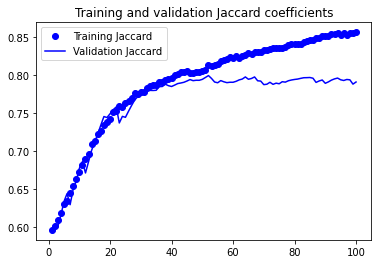

Max Validation Acc: 0.9469421736132451
Min Validation Loss: 0.20023263514943643
Max Validation Dice: 0.8779458662942835
Max Validation Jaccard: 0.7997672477394377


In [10]:
plot_graphs(history, smooth=True)

In [7]:
test_dataset = Preprocessed_Dataset(test_images, test_masks, image_size, mask_size, len(test_images), batch_size)

In [ ]:
test_loss, test_acc, test_dice, test_jacc = model.evaluate(test_dataset, steps=200)
print('test loss:', test_loss)
print('test acc:', test_acc)
print('test dice:', test_dice)
print('test jacc:', test_jacc)

200/200 [==============================] - 3s 13ms/step - loss: 0.5725 - acc: 0.8998 - dice_coef: 0.5955 - jacc_coef: 0.4275
test loss: 0.5724732875823975
test acc: 0.8997952342033386
test dice: 0.5955406427383423
test jacc: 0.4275267422199249


1/1 [==============================] - 0s 25ms/step


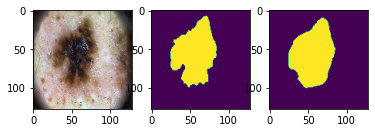

1/1 [==============================] - 0s 25ms/step


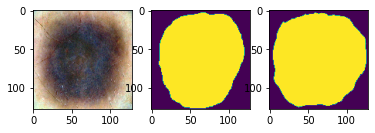

1/1 [==============================] - 0s 25ms/step


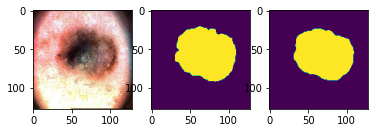

1/1 [==============================] - 0s 25ms/step


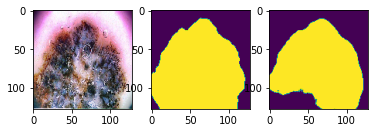

1/1 [==============================] - 0s 25ms/step


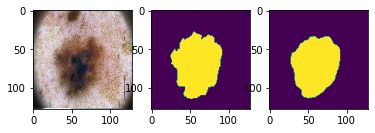

In [10]:
import matplotlib.pyplot as plt
test_dataset = Preprocessed_Dataset(test_images, test_masks, image_size, mask_size,  len(test_images), batch_size=1)
for image, mask in test_dataset.take(5).as_numpy_iterator():
  prediction = model.predict(image)
  f, ax = plt.subplots(1,3)
  ax[0].imshow(image[0])
  ax[1].imshow(mask[0].squeeze(axis=2))
  ax[2].imshow(prediction[0].squeeze(axis=2))
  plt.show()